<a href="https://colab.research.google.com/github/tracyhua2/DS3001/blob/main/Labs/Lab_1_Pandas_and_Data_Sourcing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Tracy Hua

## **Computing ID:** njn4gb

# Lab 1: Pandas and Data Sourcing (50 Points)
Version 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=522a9e95ec3ab32074602d07aae423e9961e54541016ab6dbb983deb95beea9b
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


## Part 1: Data Structure Review and Pandas Functions (20 Points)

## **Question 1 (10 points):** Read in or load a dataset as a Pandas DataFrame with at least 3 features and no more than 5. You may need to drop or filter columns in larger DataFrames. Make a single summary visual that encodes *all* the features (ie: columns) in your DataFrame. You may load your own dataset in (ie: from Kaggle), or pick from the datasets available in PyDataset already loaded below for your convenience.

For example, you could summarize a dataset with 3 features with a simple scatter plot and colors for different values in a column. You could also plot each column individually. Features like different line or point labels, plot types, color, marker shapes, and even subplots might be necessary!

In [2]:
# Read in raw data and and load in
movie_url = "https://raw.githubusercontent.com/tracyhua2/DS3001/refs/heads/main/Data/imdb_top_1000.csv"

movie_df = pd.read_csv(movie_url)

# Drop columns (movie link, year, votes)
movie_df.drop(['Poster_Link','Certificate','Runtime','Overview','Director',
               'Star1','Star2','Star3','Star4','No_of_Votes','Genre','Meta_score'], axis=1, inplace=True)

# Drop NA values
movie_df.dropna(inplace=True)

# Removes commas and coverts to integer
movie_df['Gross'] = movie_df['Gross'].str.replace(',', '').astype(int)

movie_df['Released_Year'] = pd.to_numeric(movie_df['Released_Year'], errors='coerce')

movie_df.head()

,Series_Title,Released_Year,IMDB_Rating,Gross
0,The Shawshank Redemption,1994.0,9.3,28341469
1,The Godfather,1972.0,9.2,134966411
2,The Dark Knight,2008.0,9.0,534858444
3,The Godfather: Part II,1974.0,9.0,57300000
4,12 Angry Men,1957.0,9.0,4360000


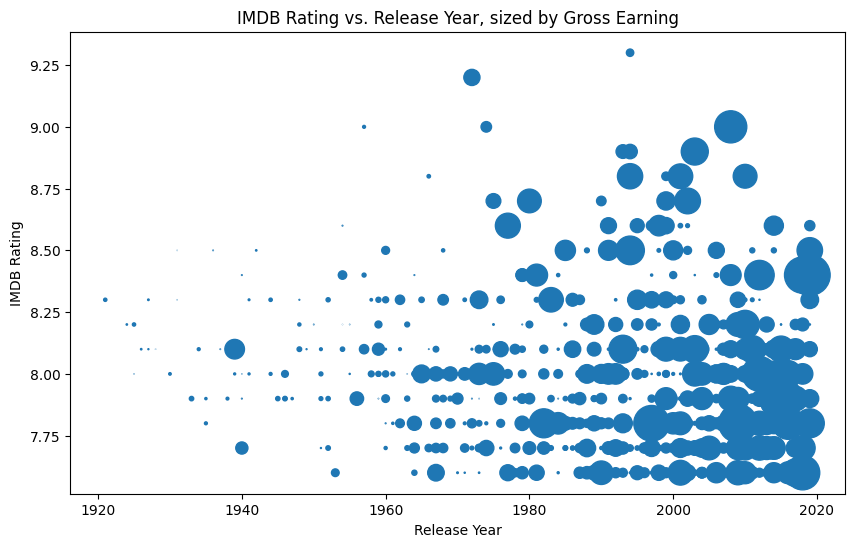

In [3]:
# Single summary visual for encoding all features
plt.figure(figsize=(10,6))
plt.scatter(
    x=movie_df['Released_Year'],y=movie_df['IMDB_Rating'], s=movie_df['Gross']*1e-6)
# *1e-6 scales the size of the bubbles
plt.xlabel("Release Year")
plt.ylabel("IMDB Rating")
plt.title("IMDB Rating vs. Release Year, sized by Gross Earning")
plt.show()

## **Question 2 (5 points):** Use your visualization to segment the dataset into at least 3 natural groups using any form of Pandas filtering functions. Save each group's data as its own DataFrame.

In [4]:
# Group 1: High IMDB rating (greater than 8.5)
high_IMDB = movie_df[movie_df['IMDB_Rating'] > 8.5]

# Group 2: High gross earning (greater than 100m)
high_Gross = movie_df[movie_df['Gross'] > 100000000]

# Group 3: Released after 1980
after_1980 = movie_df[movie_df['Released_Year'] > 1980]

## **Question 3 (5 points):** Print a summary of each DataFrame including its size, shape, and descriptive statistics using the describe function. Write a few sentences in a text cell on if any relationships emerge and if the results are surprising or expected.

In [5]:
# Group 1: Size
high_IMDB.size

116

In [6]:
# Group 1: Shape
high_IMDB.shape

(29, 4)

In [7]:
# Group 1: descriptive statistics
high_IMDB.describe()

,Released_Year,IMDB_Rating,Gross
count,29.000000,29.000000,2.900000e+01
mean,1991.655172,8.768966,1.555576e+08
std,16.074105,0.191056,1.402190e+08
min,1954.000000,8.600000,2.690610e+05
25%,1980.000000,8.600000,4.683639e+07
50%,1995.000000,8.700000,1.120000e+08
75%,2001.000000,8.900000,2.904751e+08
max,2019.000000,9.300000,5.348584e+08


It seems that there are actually not many movies with an IMDB score higher than 8.5 (only 2). These results make sense since IMDB ratings are very subjective so I would assume it is difficult to get a high score.

In [8]:
# Group 2: Size
high_Gross.size

748

In [9]:
# Group 2: Shape
high_Gross.shape

(187, 4)

In [10]:
# Group 2: Descriptive Statistics
high_Gross.describe()

,Released_Year,IMDB_Rating,Gross
count,186.000000,187.000000,1.870000e+02
mean,2002.887097,7.996257,2.266990e+08
std,14.358467,0.341780,1.374060e+08
min,1939.000000,7.600000,1.000125e+08
25%,1997.000000,7.700000,1.320808e+08
50%,2008.000000,7.900000,1.880200e+08
75%,2014.000000,8.100000,2.757076e+08
max,2019.000000,9.200000,9.366622e+08


There are also few movies with a high gross earning, which I am also not surprised about, but there are still more than movies with high IMDB.

In [11]:
# Group 3: Size
after_1980.size

2576

In [12]:
# Group 3: Shape
after_1980.shape

(644, 4)

In [13]:
# Group 3: Descriptive Statistics
after_1980.describe()

,Released_Year,IMDB_Rating,Gross
count,644.000000,644.000000,6.440000e+02
mean,2003.520186,7.923602,7.807523e+07
std,10.012491,0.278580,1.195128e+08
min,1981.000000,7.600000,1.305000e+03
25%,1996.000000,7.700000,4.035192e+06
50%,2004.000000,7.900000,2.794346e+07
75%,2012.000000,8.100000,1.030005e+08
max,2019.000000,9.300000,9.366622e+08


It is interesting that of the around 1000 movies, that 644 of those are from after 1980. I would maybe want to categorize them by decades and see the trends there.

## Part 2: Getting Data From APIs and Web Scraping (30 points)
A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

In the 2nd part of this lab, you will choose from utilizing a simple API for getting and analyzing data through a variety of queries or web scraping a page.

**Web Scraping Examples**
* Any Wikipedia page
  * https://en.wikipedia.org/wiki/Capybara  
  * https://en.m.wikipedia.org/wiki/List_of_common_misconceptions
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape


**API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.



## **Question 1 (5 points):** Pick a URL (several examples are above) to either web scrape data from OR query using an API (no need to do both). Download your initial raw data using the `requests` package and store it in a variable.

## Print your variable. Observe what kind of data your API or website can produce and design a DataFrame of at least 1 column you would like to create. Write the feature(s) you plan on obtaining below.



### **URL Chosen:** Text

### **API or Web Scraping:** Text

### **DataFrame Column(s):** Feature 1

In [79]:
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

url = "https://apiv3.iucnredlist.org/api/v3/country/getspecies/US?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee"

r = requests.get(url, headers=headers)
r

<Response [200]>

## **Question 2 (10 points):**
## Create the DataFrame of your selected feature(s). Whether using an API or scraping, you might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data!



In [80]:
data = r.json()
df = pd.DataFrame(data)
df.head()

,count,country,result
0,12788,us,"{'taxonid': 173005000, 'scientific_name': 'Abaeis nicippe', 'subspecies': None, 'rank'..."
1,12788,us,"{'taxonid': 155277, 'scientific_name': 'Abantennarius analis', 'subspecies': None, 'ra..."
2,12788,us,"{'taxonid': 67968587, 'scientific_name': 'Abantennarius drombus', 'subspecies': None, ..."
3,12788,us,"{'taxonid': 67968599, 'scientific_name': 'Abantennarius duescus', 'subspecies': None, ..."
4,12788,us,"{'taxonid': 123707530, 'scientific_name': 'Abelmoschus moschatus', 'subspecies': None,..."


In [81]:
df['taxonid'] = df['result'].apply(lambda x: x['taxonid'])
df['scientific_name'] = df['result'].apply(lambda x: x['scientific_name'])
df['subspecies'] = df['result'].apply(lambda x: x['subspecies'])
df['subpopulation'] = df['result'].apply(lambda x: x['subpopulation'])
df['category'] = df['result'].apply(lambda x: x['category'])

df = df.drop(columns=['count','result'])
df.head()

,country,taxonid,scientific_name,subspecies,subpopulation,category
0,us,173005000,Abaeis nicippe,None,None,LC
1,us,155277,Abantennarius analis,None,None,LC
2,us,67968587,Abantennarius drombus,None,None,LC
3,us,67968599,Abantennarius duescus,None,None,LC
4,us,123707530,Abelmoschus moschatus,None,None,LC


## **Question 3 (15 points):** Perform an exploratory analysis on the DataFrame you've created, making modifications to it as necessary. Some example features to explore include:
* If you've scraped text data, plot a few rows of data
* If you've scraped any image URLs, plot a few of them
* If you've scraped any image URLs, add a column for file extension type
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, write down 1 to 2 sentences about any interestings aspects of your data (group characteristics, clear relationships between variables) or your process of getting it.

In [82]:
df.head(10)

,country,taxonid,scientific_name,subspecies,subpopulation,category
0,us,173005000,Abaeis nicippe,None,None,LC
1,us,155277,Abantennarius analis,None,None,LC
2,us,67968587,Abantennarius drombus,None,None,LC
3,us,67968599,Abantennarius duescus,None,None,LC
4,us,123707530,Abelmoschus moschatus,None,None,LC
5,us,42271,Abies amabilis,None,None,LC
6,us,42272,Abies balsamea,None,None,LC
7,us,46521861,Abies balsamea var. balsamea,balsamea,None,LC
8,us,46521889,Abies balsamea var. phanerolepis,phanerolepis,None,DD
9,us,34019,Abies bracteata,None,None,NT


In [85]:
# count subspecies
by_subspecies = df['subspecies'].value_counts()
by_subspecies.head()

,count
subspecies,
kauaiensis,3
alabamensis,3
virginiana,2
humilis,2
lanaiense,2


In [86]:
# count subpopulation
by_subpopulation = df['subpopulation'].value_counts()
by_subpopulation.head()

,count
subpopulation,
Northwest Atlantic subpopulation,3
Gulf of Maine subpopulation,2
East Pacific subpopulation,2
Connecticut subpopulation,1
KODIAK ISLAND,1


In [87]:
# count category
by_category = df['category'].value_counts()
by_category.head()

,count
category,
LC,8887
VU,827
DD,762
CR,744
EN,730


Looking at the count for category, or how they are described in relation to concern of extinction or becoming endangered, most of them are considered "LC" or least concern. It also seems that both subspecies and subpopulation aren't as heavily grouped together, meaning there are more unique values than those grouped together, or even none at all.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.

- Tracy Hua